## Определение надежности заемщиков банка.

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

##### В данном исследовании представлена таблица с данными заемщиков банка.
##### В них перечислены семейное положение клиента, его доход, образование, возраст и тд

Часть 1. Изучение общей информации:
1. <a href='#1'>Загрузка библиотек, изучение файла с данными, получение общей информации о датафрейме.</a>
2. <a href='#2'>Нахождение и ликвидация пропусков.</a>

Часть 2. Подготовка данных:
1. <a href='#3'>Приведение данных к нужным типам.</a>
2. <a href='#4'>Нахождение и исправление аномалий и ошибок.</a>

Часть 3. Работа с данными:
1. <a href='#5'>Лемматизация и сортировка данных в датафрейме</a>
2. <a href='#6'>Категоризация данных по разным и необходимым условиям</a>

Часть 4. Общие выводы и ответы на вопросы по окончанию исследования.
1. <a href='#7'>Вывод по зависимости между наличием детей и возвратом кредита в срок</a>
2. <a href='#8'>Вывод по зависимости между семейным положением и возвратом кредита в срок</a>
3. <a href='#9'>Вывод по зависимости между уровнем дохода и возвратом кредита в срок</a>
4. <a href='#10'>Вывод по зависимости между целями кредита и их возвратами в срок</a>
5. <a href='#11'>Общий вывод по итогу исследования</a>

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id='1'></a>

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.shape

(21525, 12)

### Вывод

1. Размер таблицы (строки х столбцы) 21525 х 12
2. Три формата данных в столбцах: Int \ Float \ Object. Все выглядит логично, нет перепутанных форматов
3. Есть пустые значения = 2174 шт в 2х столбцах: 'days_employed' и 'total_income'. У обоих столбцов формат Float
4. Странные, отрицательные значения в столбце 'days_employed'
5. Названия столбцов названы хорошо, без лишних пробелов и в нижнем регистре

### Шаг 2. Предобработка данных

### Обработка пропусков <a id='2'></a>

In [4]:
data.isnull().sum() # считаем пустые значения по столбцам

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
data[data['total_income'].isnull()].head(3) #для проверки смотрим на пустые значения

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости


In [6]:
data['total_income'].mean() #считаем среднее арифм-е по столбцу доходы

167422.30220817294

In [7]:
#data.groupby('income_type').aggregate({'total_income' : 'median'})
#расчет медианного значения дохода по всем категориям граждан

In [8]:
# заполним total_income медианным значением по каждому типу доходов
for income_type in data['income_type'].unique():
    data.loc[(data['total_income'].isna()) & (data['income_type']==income_type), 'total_income']=\
    data[data['income_type']==income_type]['total_income'].median()

In [9]:
data.isna().sum() # проверка

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

In [10]:
import matplotlib.pyplot as plt #загружаем plt для краткой визуализации данных

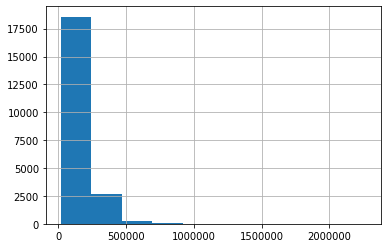

In [11]:
data['total_income'].hist() #смотрим распределение доходов - выглядит вполне все адекватно

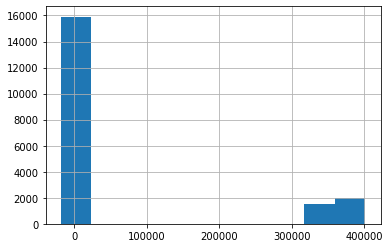

In [12]:
data['days_employed'].hist() #смотрим распределение трудового стажа в днях - 
#видим странный кусок распределения < 0. скорее всего это технологическая ошибка в данных
#и нужно донести эту инфу до коллег

In [13]:
data[(data['days_employed'] < 0)].median() 
#для перепроверки смотрим среднее занчение в годах клиентов - может быть значения чуть > нуля
# это более менее нормально? может люди только начали работать после школы и тд
#средний возраст 39 лет это слишком много, высокая вероятность, что это все-таки технол-я ошибка 

children                 0.000000
days_employed        -1630.019381
dob_years               39.000000
education_id             1.000000
family_status_id         0.000000
debt                     0.000000
total_income        151134.593479
dtype: float64

In [14]:
data.loc[data['days_employed'] < 0, 'days_employed'] = 0
#также заменим все значения < 0 на нулевые

In [15]:
data['days_employed'] = data['days_employed'].fillna(0)
data.isnull().sum()
# заменяем все пропущенные нулем

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

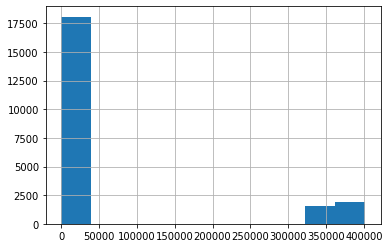

In [16]:
data['days_employed'].hist()
#смотрим распределение для проверки - отрицательных значений не осталось
#также обращаем внимание на часть данных > 100 000 - это скорее всего тоже технол-я ошибка

### Вывод

1. Стоит обратить внимание на пустые данные по доходам почти у всех типов клиентов, необходимо
донести эту информацию до соответсвующих лиц

2. Отмечаем достаточно высокий уровень месячного медианного дохода у клиентов банка, значительно выше медианного по стране :)

3. Стоит обратить внимание на отрицательные значения в трудовых днях клиентов, а также на чересчур высокие значения трудового стажа. Это технологическая ошибка

### Замена типа данных <a id='3'></a>

In [17]:
data['days_employed'] = data['days_employed'].astype('int') 
#меняем Float на Int для большей наглядности

In [18]:
data['total_income'] = data['total_income'].astype('int') 
#меняем Float на Int для большей наглядности

In [19]:
data.info() #проверяем изменились ли форматы в двух столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


In [20]:
data.head() # смотрим как поменялись значения в целом в датафрейме

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Обработка дубликатов <a id='4'></a>

In [21]:
data.duplicated().sum() #сколько дубликатов в целом в датафрейме, 54шт

54

In [22]:
data = data.drop_duplicates().reset_index(drop=True) #удаляем дубликаты

In [23]:
data.duplicated().sum() #проверяем сколько осталось после удаления, 
#0 - значит явные дубликаты удалены

0

In [24]:
data.shape #проверяем размер таблицы и сверяем с прошлым размером
#21471 + 54 = 21525 как и было в самом начале

(21471, 12)

In [25]:
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['purpose'] = data['purpose'].str.lower()
#замечаем, что в этих столбцах могут быть разные регистры и переводим все в нижний

In [26]:
data.duplicated().sum()
#считаем после этой замены новые дубликаты, их появляется еще 17шт

17

In [27]:
data = data.drop_duplicates().reset_index(drop=True) #удаляем снова новые дубликаты
data.duplicated().sum() #делаем проверку, все дубликаты удалены

0

In [28]:
data.shape # новыестроки после удаления 21471 - 17 = 21454

(21454, 12)

In [29]:
data.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья


In [30]:
data['children'].value_counts()

#e 47 клиентов встречается '-1' ребенок - скорее всего это ошибка челов-го фактора
#после проверки остальных столбцов тем же способом больше явных ошибок не обнаружено

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [31]:
data['children'] = data['children'].abs() # заменяем -1 модулем через функцию abs

In [32]:
data['children'].value_counts() #проверяем остались ли отрицат-е значения
# есть также слишком большое кол-во детей у 76 клиентов - 20шт, это наверняка человеч-й фактор,
#но пока не будем изменять их
# 20 детей у клиентов - доля меньше 0,5% - может быть, что это даже и реально,
#вдруг фермеры-староверы :)

0     14091
1      4855
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

### Вывод 

1. Отмечаем, что в наших данных встречается 71 дубликат
2. Существуют ошибки в данных в столбце 'children' - попадаются отрицательные значения
и очень большие значения у 76 клиентов, у которых 20 детей. Их доля менее 0.5%

### Лемматизация <a id='5'></a>

In [33]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [34]:
from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')

import pandas as pd
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [35]:
def purpose_group(row):
    for query in row.split():
        lemmas = m.lemmatize(row)
        return lemmas
# создаем функцию для лемматизации в цикле

In [36]:
data['purpose_list'] = data['purpose'].apply(purpose_group) 
#вызываем функцию и выводим ее результат в новом столбце 'purpose_list'

In [37]:
data.head(2) #проверяем

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_list
0,1,0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"


In [38]:
my_list = data['purpose_list'].tolist()
my_list = data['purpose_list'].values
my_list
#создаем переменную my_list и в нее сохраняем массив списков значений из нового столбца 'purpose_list'

array([list(['покупка', ' ', 'жилье', '\n']),
       list(['приобретение', ' ', 'автомобиль', '\n']),
       list(['покупка', ' ', 'жилье', '\n']), ...,
       list(['недвижимость', '\n']),
       list(['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n']),
       list(['на', ' ', 'покупка', ' ', 'автомобиль', '\n'])],
      dtype=object)

In [39]:
new_list = []
for i in my_list:
    new_list = new_list + i
    
new_list = pd.Series(new_list)
new_list.value_counts().head(50)
#создаем цикл и заносим в общий список new_list все значения из столбца 'purpose'
#создаем из списка Series
#выводим кол-во по популярности цели

                  33570
\n                21454
недвижимость       6351
покупка            5897
жилье              4460
автомобиль         4306
образование        4013
с                  2918
операция           2604
свадьба            2324
свой               2230
на                 2222
строительство      1878
высокий            1374
получение          1314
коммерческий       1311
для                1289
жилой              1230
сделка              941
дополнительный      906
заниматься          904
проведение          768
сыграть             765
сдача               651
семья               638
собственный         635
со                  627
ремонт              607
подержанный         486
подержать           478
приобретение        461
профильный          436
dtype: int64

In [40]:
# создаем функцию для классификации целей на 4 категории: недвиж-ть\автомобиль\образование\свадьба
def find_purpose(row):
    for query in row:
        if ('жилье' in query) | ('недвижимость' in query):
            return 'недвижимость'
        if 'автомобиль' in query:
            return 'автомобиль'
        if 'образование' in query:
            return 'образование'
        if 'свадьба' in query:
            return 'свадьба'
       


In [41]:
data['final_purpose'] = data['purpose_list'].apply(find_purpose)
data['final_purpose'].unique()
#применяем функцию к новому столбцу 'final_purpose', выводим уникальные значения для этого столбца
#пустых значений нет, значит все категории уместились в эти 4 категории

array(['недвижимость', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

In [42]:
data['final_purpose'].value_counts()
#смотрим самые популярные запросы на кредиты

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: final_purpose, dtype: int64

### Вывод

Самые популярные в количественном плане кредиты люди берут на покупку недвижимости - в 2 раза чаще, чем 2й по популярности запрос - покупка автомобиля

### Категоризация данных <a id='6'></a>

In [43]:
data_cut = data[['family_status', 'debt', 'final_purpose', 
                 'income_type', 'days_employed', 'children', 'total_income']]
#создаем новый обрезанный датафрейм

In [44]:
family_status = data_cut.pivot_table(index='family_status', columns='debt', 
                               values='final_purpose', aggfunc='count').reset_index()
family_status = family_status.rename(columns={0:'no_debt', 1:'debt'})
family_status['%'] = 100*family_status['debt'] / (family_status['no_debt'] + family_status['debt'])
family_status
#создаем сводную таблицу и считаем для разных типов % просроченных клиентов от общего в данной группе

debt,family_status,no_debt,debt,%
0,в разводе,1110,85,7.112971
1,вдовец / вдова,896,63,6.569343
2,гражданский брак,3763,388,9.347145
3,женат / замужем,11408,931,7.545182
4,не женат / не замужем,2536,274,9.750890


In [45]:
def child(number):
    if number >=1:
        return 'с детьми'
    else:
        return 'без детей'

data['children_group'] = data['children'].apply(child)
data.head(2)

#функция для категоризации клиентов по наличию детей или их отсутствием

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_list,final_purpose,children_group
0,1,0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,с детьми
1,1,0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль,с детьми


In [46]:
children_new = data.pivot_table(index='children_group', columns='debt', 
                          values='family_status', aggfunc='count', fill_value=0).reset_index()
children_new = children_new.rename(columns={0:'no_debt', 1:'debt'})
children_new['%'] = 100*children_new['debt'] / (children_new['no_debt'] + children_new['debt'])
children_new

# создаем новую категоризацию с детьми с новой группировкой: 'с детьми' и 'без детей'

debt,children_group,no_debt,debt,%
0,без детей,13028,1063,7.543822
1,с детьми,6685,678,9.208203


In [47]:
purpose = data_cut.pivot_table(index='final_purpose', columns='debt', 
                         values='family_status', aggfunc='count')
purpose = purpose.rename(columns={0:'no_debt', 1:'debt'})
purpose['%'] = 100*purpose['debt'] / (purpose['no_debt'] + purpose['debt'])
purpose

debt,no_debt,debt,%
final_purpose,,,
автомобиль,3903,403,9.359034
недвижимость,10029,782,7.233373
образование,3643,370,9.220035
свадьба,2138,186,8.003442


In [48]:
a = data_cut['total_income'].quantile(0.2) #берем границы для градации дохода
b = data_cut['total_income'].quantile(0.5)
c = data_cut['total_income'].quantile(0.8)

In [49]:
def salary(income):
    if income <= a:
        return 'низкий_доход'
    if income >= c:
        return 'высокий_доход'
    else:
        return 'средний_доход'
    #функция для расчета градации дохода

In [50]:
data['income_level'] = data['total_income'].apply(salary)
data_cut = data[['family_status', 'debt', 'final_purpose', 
                 'income_type', 'days_employed', 'children', 'total_income', 'income_level']]

In [51]:
income = data_cut.pivot_table(index='income_level', columns='debt', 
                          values='family_status', aggfunc='count', fill_value=0).reset_index()
income = income.rename(columns={0:'no_debt', 1:'debt'})
income['%'] = 100*income['debt'] / (income['no_debt'] + income['debt'])
income

debt,income_level,no_debt,debt,%
0,высокий_доход,3991,300,6.991377
1,низкий_доход,3947,344,8.016779
2,средний_доход,11775,1097,8.522374


### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [52]:
children_new

debt,children_group,no_debt,debt,%
0,без детей,13028,1063,7.543822
1,с детьми,6685,678,9.208203


### Вывод <a id='7'></a>

Можно с высокой долей уверенности заявить,что клиенты с детьми имеют намного более высокие задолженности по сравнению с клиентами без детей.
Разница составляет почти 2 процентных пункта.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [53]:
family_status

debt,family_status,no_debt,debt,%
0,в разводе,1110,85,7.112971
1,вдовец / вдова,896,63,6.569343
2,гражданский брак,3763,388,9.347145
3,женат / замужем,11408,931,7.545182
4,не женат / не замужем,2536,274,9.750890


### Вывод <a id='8'></a>

- Самые высокие показатели задолженности у людей в гражданском браке и у неженатых\незамужних. Возможно это более молодые и беспечные граждане, которые пока слишком легко относятся к невыплатам заемных средств
- У женатых людей и людей в разводе примерно одинаковые показатели, видимо они более дисциплинированы в своих финансовых делах
- Самый низкий показатель у вдовцов\вдов. Скорее всего это уже пожилые люди и они серьезнее относятся к кредитам и денежным средствам

В целом % просроченных кредитов по всем категориям < 10% и ни одна группа сильно не выбивается из обшего списка

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [54]:
income

debt,income_level,no_debt,debt,%
0,высокий_доход,3991,300,6.991377
1,низкий_доход,3947,344,8.016779
2,средний_доход,11775,1097,8.522374


### Вывод <a id='9'></a>

- Самые дисциплинированные клиенты - это клиенты с низким и высоким уровнем дохода

В целом % просроченных кредитов по всем категориям < 10% и ни одна группа сильно не выбивается из обшего списка

- Как разные цели кредита влияют на его возврат в срок?

In [55]:
purpose

debt,no_debt,debt,%
final_purpose,,,
автомобиль,3903,403,9.359034
недвижимость,10029,782,7.233373
образование,3643,370,9.220035
свадьба,2138,186,8.003442


### Вывод <a id='10'></a>

- Самые проблемные кредиты по категории автомобиль. По всей видимости это не самые финансово успешные клиенты и с невысоким уровнем дохода
- Самые "успешные" кредиты идут для покупки недвижимости, как коммерческой, так и жилой

В целом % просроченных кредитов по всем категориям < 10% и ни одна группа сильно не выбивается из обшего списка

### Шаг 4. Общий вывод <a id='11'></a>

Лучшие клиенты без задолженностей - это клиенты без детей, состоящие в браке и берущие кредит на покупку недвижимости. По данной категории будет самый низкий % просрочки.

P.S. Ни одна из изученных категорий людей или кредитов не показала себя сильно отличающейся от общей картины в целом. Сильно выраженных "белых" ворон на первый взгляд не обнаружено
